In [ ]:
import tensorflow as tf
import tensorflow_hub as hub

import matplotlib.pyplot as plt

import os
import re
import numpy as np
import pandas as pd

from sklearn.metrics.pairwise import cosine_similarity
from sklearn.neighbors import NearestNeighbors
from sklearn.decomposition import PCA

In [ ]:
model_url="https://tfhub.dev/google/universal-sentence-encoder/4"
model=hub.load(model_url)


In [ ]:
def embed(texts):
  return model(texts)

In [ ]:
df=pd.read_csv('/content/linkedin_posts_df.csv', engine='python')
df.head()


,POST_URN,POST_URL,TITLE,TEXT,TIME_DELTA,DATE_APPROX,LIKES,DIRECT_COMMENTS,COMMENTS,VIEWS,LIKES_LIKE,LIKES_PRAISE,LIKES_APPRECIATION,LIKES_EMPATHY,LIKES_MAYBE,LIKES_INTEREST
0,6.821830e+18,https://www.linkedin.com/posts/mafreeman2_onth...,🎁 Feedback is a gift! I want to share an exper...,🎁 Feedback is a gift! I want to share an exper...,2d,17-07-2021,22.0,2.0,2.0,966.0,19.0,1.0,1.0,1.0,0.0,0.0
1,6.821470e+18,https://www.linkedin.com/posts/mafreeman2_data...,"We all make mistakes, even when you are a data...","We all make mistakes, even when you are a data...",3d,16-07-2021,39.0,4.0,4.0,1355.0,33.0,5.0,1.0,0.0,0.0,0.0
2,6.821100e+18,https://www.linkedin.com/posts/mafreeman2_wow-...,😮 WOW WOW WOW! A paper that I'm a co-author on...,😮 WOW WOW WOW! A paper that I'm a co-author on...,4d,15-07-2021,223.0,19.0,35.0,10786.0,163.0,47.0,0.0,12.0,1.0,0.0
3,6.820740e+18,https://www.linkedin.com/posts/mafreeman2_onth...,👇🏽 Want to stay on top of data science trends ...,👇🏽 Want to stay on top of data science trends ...,5d,14-07-2021,49.0,7.0,20.0,4365.0,44.0,1.0,0.0,3.0,0.0,1.0
4,6.820380e+18,https://www.linkedin.com/posts/mafreeman2_onth...,Made some great progress on my tutorial on how...,Made some great progress on my tutorial on how...,6d,13-07-2021,37.0,6.0,16.0,1698.0,33.0,2.0,0.0,1.0,1.0,0.0


In [ ]:
df=df.dropna()
df=df.reset_index()
df=df[:5500]

In [ ]:
titles=list(df['TEXT'])

In [ ]:
titles[:5]

['🎁 Feedback is a gift! I want to share an experience that happened yesterday highlighting this....💻 My friend reached out to learn about the data space as he is preparing for a big interview. I spent 30 minutes explaining what\'s considered "the modern data stack", but the most important conversation happened at the end.🧐 I asked, "Do you have any constructive feedback for me? I want to do more public speaking on the topic of data, and I would love to know what worked and didn\'t for our conversation."🎤 He informed me that the way I emphasize certain words when I speak was extremely helpful in learning a new topic.🤯 MY MIND WAS BLOWN, as it informed me of a strength that 1) I was completely unaware of, and 2) I can further refine.📈 Asking for feedback may make you feel vulnerable at first, but in the long run it will provide you key insights for long term success. Some feedback is amazing (both positive and constructive), and other feedback can be lacking. Regardless, someone going ou

In [ ]:
embeddings=embed(titles)
print('The embedding shape is: ', embeddings.shape)

The embedding shape is:  (103, 512)


In [ ]:
pca=PCA(n_components=2)
emb_2d=pca.fit_transform(embeddings)

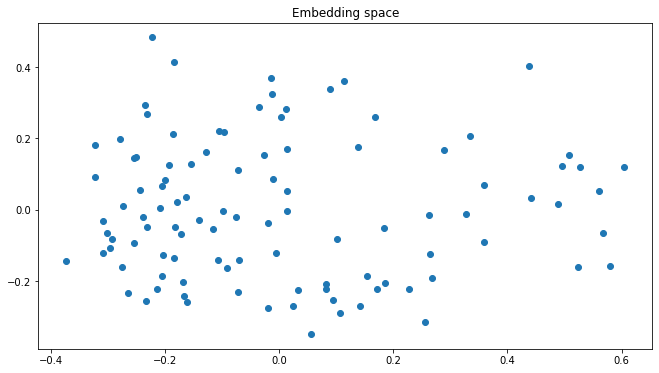

In [ ]:
plt.figure(figsize=(11, 6))
plt.title('Embedding space')
plt.scatter(emb_2d[:,0], emb_2d[:,1])
plt.show()

In [ ]:
nn=NearestNeighbors(n_neighbors=10)
nn.fit(embeddings)

NearestNeighbors(n_neighbors=10)

In [ ]:
NearestNeighbors(n_neighbors=10)

NearestNeighbors(n_neighbors=10)

In [ ]:
def recommend(text):
  emb=embed([text])
  neighbors=nn.kneighbors(emb, return_distance=False)[0]
  return df['TEXT'].iloc[neighbors].tolist()

In [ ]:
print('Recommended Posts: ')
recommend('Inspiration')

Recommended Posts: 


['I\'m so proud of my recent accomplishment! I WAS ABLE TO SET BOUNDARIES WITH MYSELF AND KEEP THEM!Though my job has been going amazing, life outside of work has been hitting my wife and I HARD and repeatedly since the beginning of this year. I bet many can relate given the pandemic.My old self would just try to "out work" the situation and try to take on everything...... and eventually burn out hard.This time I took a step back and asked myself "what do I value, and what can I realistically handle to ensure I maintain what I value?"The hardest part was the "realistic" component, as I\'m passionate about so many things and give my all to them. But eventually I prioritized and cut out a lot from my life.The result... handling life\'s challenges became easier and quicker to resolve. I\'m able to focus more on what I care about and I\'m a lot better at saying "no" or "not right now."Though there are a few things I really want to bring back into my life (e.g. community health volunteering